In [1]:
#importing the necessary libraries

import numpy as np
import cv2  #converting images into arrays
import os #to specify location of images
import random
import matplotlib.pyplot as plt
# import pickle #to save the data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [2]:
directory_tr = r'C:\Users\ABHISHEK DEORE\OneDrive\Desktop\my_ds\train'
directory_ts = r'C:\Users\ABHISHEK DEORE\OneDrive\Desktop\my_ds\test'

categories = ['cat','dog'] 

In [3]:
# defining the image size
img_size = 110

#accessing the images in the training and testing dataset
data1 = []
data2 = []

# accessing inmages from the training dataset
for categ in categories:
    folder = os.path.join(directory_tr,categ)
    label= categories.index(categ) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data1.append([img_arr,label])
        
# accessing inmages from the testing dataset 
for categ in categories:
    folder = os.path.join(directory_ts,categ)
    labels= categories.index(categ) 
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data2.append([img_arr,labels])

In [4]:
# printing length of lists created
print(len(data1))
print(len(data2))

2000
156


In [5]:
# shuffling the data
random.shuffle(data1)
random.shuffle(data2)

In [6]:
# seprating the images and labels
X_tr=[]
y_tr=[]

X_ts=[]
y_ts=[]

for features, labels in data1:
    X_tr.append(features)
    y_tr.append(labels)
   
for features, labels in data2:
    X_ts.append(features)
    y_ts.append(labels)

In [7]:
# converting data into array
X_tr=np.array(X_tr)
y_tr=np.array(y_tr)

X_ts=np.array(X_ts)
y_ts=np.array(y_ts)

In [8]:
# normalizing the data
X_tr=X_tr/255
X_ts=X_ts/255

In [9]:
# building the model

model = Sequential()

#first convolutional layer
model.add(Conv2D(64, (3,3), activation = 'relu')) #first layer is convolutional layer with 64 feature detectors of 3 by 3 matrix
                                                  # and an activation function as relu

model.add(MaxPooling2D((2,2))) #next layer is the maxpooling layer with a 2 by 2 matrix


#second convolutional layer
model.add(Conv2D(128, (3,3), activation = 'relu')) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation = 'relu')) 
model.add(MaxPooling2D(2,2))


# adding flatten and dense layers
model.add(Flatten())
model.add(Dense(128, input_shape=(110,110,3), activation='relu'))
model.add(Dense(2, activation = 'softmax'))

In [10]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# training the model using fit method
history = model.fit(X_tr, y_tr, epochs=15, batch_size=64)

Epoch 1/15
32/32 [==============================] - 35s 1s/step - loss: 0.7336 - accuracy: 0.5055
Epoch 2/15
32/32 [==============================] - 34s 1s/step - loss: 0.6933 - accuracy: 0.5105
Epoch 3/15
32/32 [==============================] - 34s 1s/step - loss: 0.6874 - accuracy: 0.5555
Epoch 4/15
32/32 [==============================] - 33s 1s/step - loss: 0.6697 - accuracy: 0.5845
Epoch 5/15
32/32 [==============================] - 33s 1s/step - loss: 0.6321 - accuracy: 0.6245
Epoch 6/15
32/32 [==============================] - 34s 1s/step - loss: 0.6006 - accuracy: 0.6600
Epoch 7/15
32/32 [==============================] - 34s 1s/step - loss: 0.5381 - accuracy: 0.7150
Epoch 8/15
32/32 [==============================] - 34s 1s/step - loss: 0.5192 - accuracy: 0.7485
Epoch 9/15
32/32 [==============================] - 36s 1s/step - loss: 0.5038 - accuracy: 0.7505
Epoch 10/15
32/32 [==============================] - 35s 1s/step - loss: 0.4453 - accuracy: 0.7845
Epoch 11/15
32/32 [

In [57]:
# evaluating the performance of model on teting dataset
model.evaluate(X_ts,y_ts)

5/5 [==============================] - 1s 171ms/step - loss: 0.8114 - accuracy: 0.7051


[0.811383843421936, 0.7051281929016113]

In [13]:
# storing the predicted values in the prediction variable
prediction=model.predict(X_ts)

5/5 [==============================] - 1s 102ms/step


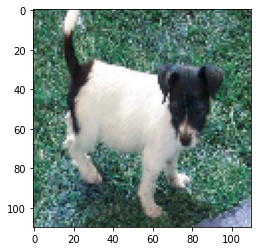

In [50]:
# randomly plotting the images
n = random.randint(0,155)
plt.imshow(X_ts[n])

In [51]:
# printing the models prediction values using argmax() function of np
# max_value = np.argmax(prediction[n]) np.argmax() return the index of highest value in the array 
if max_value == 0:
    print('The image is of a Cat')
if max_value == 1:
    print('The image is of a Dog')

The image is of a Dog


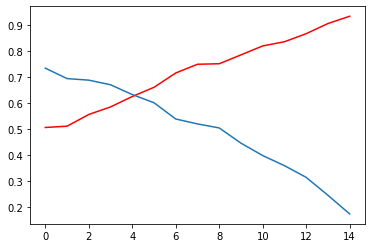

In [52]:
# plotting the graph of accuracy and loss over the epochs

plt.plot(history.history['accuracy'], color= 'red')
plt.plot(history.history['loss'])